In [ ]:
                                                 Le probleme du sac à dos

In [191]:
# packages utiles
import random
import time
import matplotlib.pyplot as plt
import tracemalloc

Dans ce TP on se propose de faire une étude détaillée du problème du sac à dos sous 4 approches différentes. Pour chaque approche on proposera un algorithme correspondant ainsi  qu'une étude détaillé.On terminera par faire des études de comparaison en trouvant des situations naturelles permettant de distinguer les 4 approches alogorithmiques selon leurs précisons, leurs vitesses d'exécutions et leur consommation mémoire. On fera des conclusions autant que nécessaire.


#### Générateur de problème de sac à dos

Dans cette section, on définit un génerateur de problème de sac à dos qui fournit de manière aléatoire un problème de taille n selon une distribution de probabilité et la corrélation des valeurs et des poids

Les paramètres à fixer sont :

- n : le nombre d'objets à générer

- max_value : la valeur maximale qu'un objet peut avoir

- max_weight : le poids maximal qu'un objet peut avoir

- distribution : la distribution des valeurs et des poids. On peut choisir entre une distribution uniforme, gaussienne ou exponentielle.

- correlation : la corrélation entre les valeurs et les poids. On peut choisir entre "none", "positive" ou "negative".

- b : la borne sur le poids du sac à dos. Elle est calculée en fonction du poids total des objets.

In [2]:

def generate_knapsack_problem(n, max_value, max_weight, distribution='uniform', correlation='none'):
    # Génération des valeurs et des poids en fonction de la distribution et de la corrélation
    values = []
    weights = []
    for i in range(n):
        if distribution == 'uniform':
            value = random.randint(1, max_value)
            weight = random.randint(1, max_weight)
        elif distribution == 'gaussian':
            value = int(random.gauss(max_value/2, max_value/6))
            value = max(1, min(value, max_value))
            weight = int(random.gauss(max_weight/2, max_weight/6))
            weight = max(1, min(weight, max_weight))
        elif distribution == 'exponential':
            value = int(random.expovariate(1/max_value))
            value = max(1, min(value, max_value))
            weight = int(random.expovariate(1/max_weight))
            weight = max(1, min(weight, max_weight))
        
        if correlation == 'none':
            pass
        elif correlation == 'positive':
            weight = int(weight * (1 + random.uniform(0, 0.5)))
            weight = min(weight, max_weight)
            value = int(value * (1 + random.uniform(0, 0.5)))
            value = min(value, max_value)
        elif correlation == 'negative':
            weight = int(weight * (1 - random.uniform(0, 0.5)))
            weight = max(1, weight)
            value = int(value * (1 - random.uniform(0, 0.5)))
            value = max(1, value)
        values.append(value)
        weights.append(weight)
        
    # Génération de la borne sur le poids
    max_weight_knapsack = int(max_weight * n * 0.6) # 60% du poids total des objets
    b = random.randint(int(max_weight_knapsack/2), max_weight_knapsack)
    
    return values, weights, b


######     tests du générateur

In [10]:
# on genere un probleme de taille 10 selon une distribution uniforme et une corrélation positive

v,w,b =  generate_knapsack_problem(10,100,100,"uniform","positive")
print("valeurs =",v)
print("poids =",w)
print("b =",b)

valeurs = [10, 36, 99, 28, 90, 52, 100, 74, 15, 79]
poids = [71, 79, 49, 31, 26, 14, 100, 100, 92, 10]
b = 408


In [11]:
# on genere un probleme de taille 19 selon une distribution gaussienne et une corrélation négative
v,w,b =  generate_knapsack_problem(19,100,100,"gaussian","negative")
print("valeurs =",v)
print("poids =",w)
print("b =",b)


valeurs = [34, 37, 50, 50, 18, 31, 62, 34, 38, 38, 37, 50, 27, 56, 20, 29, 25, 42, 73]
poids = [34, 35, 34, 41, 51, 45, 38, 39, 19, 67, 40, 41, 42, 40, 16, 11, 12, 35, 52]
b = 849


In [12]:
# on genere un probleme de taille 30 selon une distribution exponentielle et une corrélation positive
v,w,b =  generate_knapsack_problem(19,100,100,"exponential","positive")
print("valeurs =",v)
print("poids =",w)
print("b =",b)


valeurs = [100, 70, 100, 17, 100, 100, 100, 62, 30, 43, 100, 82, 100, 59, 14, 15, 100, 25, 3]
poids = [100, 100, 81, 100, 76, 100, 100, 100, 70, 100, 18, 9, 12, 100, 15, 100, 63, 69, 100]
b = 719


#### bornes supérieures et bornes inférieures

Dans cette section on propose d'implémenter l'approche borne sup et borne inf pour le problème du sac à dos. Nous allons voir en premier lieu borne sup puis la borne inf 

In [32]:
  **************************************************  Borne supérieure   ********************************************************

La fonction borne_sup ci dessous calcule la borne supérieure en permettant une fraction des objets. Elle trie d'abord les objets en ordre décroissant de ratio valeur/poids, puis elle itère sur les objets et ajoute leur valeur au sac à dos tant que le poids restant le permet. Si le poids de l'objet dépasse le poids restant, elle ajoute une fraction de l'objet pour remplir le sac à dos. La valeur totale obtenue est la borne supérieure pour le problème.

On a en arguments :
- param v: la liste des valeurs des objets
- param w: la liste des poids des objets
- param b: la capacité du sac à dos
- return: la borne supérieure pour le problème du sac à dos

In [165]:
def borne_sup(v, w, b):
    n = len(v)
    ratio = [(v[i] / w[i], i) for i in range(n)]
    ratio.sort(reverse=True)
    valeur = 0
    poids_restant = b
    for r, i in ratio:
        #print("valeur =", valeur, "poids_restant =", poids_restant, "r =", r)
        if poids_restant == 0:
            break
        elif w[i] <= poids_restant:
            valeur += v[i]
            poids_restant -= w[i]
        else:
            fraction = poids_restant / w[i]
            valeur += fraction * v[i]
            poids_restant -= fraction * w[i]
    return valeur

###### tests du borne_sup

In [20]:
v,w,b = generate_knapsack_problem(5,100,100,"exponential", None)
print("valeurs =",v)
print("poids =",w)
print("b =",b)
print("la borne supérieure est:" , borne_sup(v,w,b))

valeurs = [100, 100, 24, 44, 69]
poids = [100, 100, 100, 13, 7]
b = 184
valeur = 0 poids_restant = 184 r = 9.857142857142858
valeur = 69 poids_restant = 177 r = 3.3846153846153846
valeur = 113 poids_restant = 164 r = 1.0
valeur = 213 poids_restant = 64 r = 1.0
valeur = 277.0 poids_restant = 0.0 r = 0.24
la borne supérieure est: 277.0


In [21]:
v = [60, 100, 120]
w = [10, 20, 30]
b = 50

resultat = borne_sup(v, w, b)

print("Résultat obtenu :", resultat)

valeur = 0 poids_restant = 50 r = 6.0
valeur = 60 poids_restant = 40 r = 5.0
valeur = 160 poids_restant = 20 r = 4.0
Résultat attendu : 240
Résultat obtenu : 240.0


In [ ]:
     **************************************************  Borne inférieure   ********************************************************

Pour obtenir une borne inférieure différente de la borne supérieure, il faut modifier la stratégie gloutonne utilisée dans la fonction borne_inf. Par exemple, on peut trier les objets par ordre de poids croissant, plutôt que par ordre de ratio $v_i/w_i$ décroissant, et ajouter autant d'objets que possible dans le sac à dos en commençant par les objets les plus légers. Cette stratégie donnera une borne inférieure plus faible que la borne supérieure obtenue en permettant des fractions d'objets.


Cette fonction calcule une borne inférieure en triant les objets par ordre de poids croissant, puis en ajoutant autant d'objets que possible dans le sac à dos en commençant par les objets les plus légers. Si l'objet actuel ne peut pas être ajouté entièrement, il est ignoré et on passe à l'objet suivant. La valeur totale des objets ajoutés est renvoyée comme borne inférieure.

In [27]:
def borne_inf(v, w, b):
    n = len(v)
    ratio = [(w[i], i) for i in range(n)]
    ratio.sort()
    valeur = 0
    poids_restant = b
    for r, i in ratio:
        if poids_restant >= w[i]:
            valeur += v[i]
            poids_restant -= w[i]
    return valeur


###### tests du borne_inf

In [29]:
v,w,b = generate_knapsack_problem(5,100,100,"exponential", None)
print("valeurs =",v)
print("poids =",w)
print("b =",b)
print("la borne inférieure est:" , borne_inf(v,w,b))

valeurs = [100, 4, 100, 31, 15]
poids = [100, 27, 100, 53, 21]
b = 296
la borne inférieure est: 150


In [30]:
v,w,b = generate_knapsack_problem(15,100,100,"gaussian", "positive")
print("valeurs =",v)
print("poids =",w)
print("b =",b)
print("la borne inférieure est:" , borne_inf(v,w,b))

valeurs = [70, 43, 35, 43, 47, 60, 47, 33, 92, 36, 44, 70, 87, 82, 50]
poids = [41, 53, 70, 53, 39, 47, 88, 64, 53, 54, 50, 64, 74, 83, 79]
b = 702
la borne inférieure est: 660


In [26]:
v = [60, 100, 120]
w = [10, 20, 30]
b = 50

resultat = borne_inf(v, w, b)

print("Résultat obtenu :", resultat)

Résultat obtenu : 160


#### Séparation et évaluation

Dans cette section on se propose d'étudier et d'implémenter l'approche séparation/évaluation. Pour ce faire on montrera un premier algorithme récursif pour montrer la montrer la non performance de la recursivité pour des problemes de grande taille  et ensuite proposer en second lieu un algorithme itératif avec gestion des piles pour contourner ce problème.

In [ ]:
**************************************************  Approche récursive du branch and bound   ********************************************************

Cette fonction prend en entrée les mêmes paramètres que la fonction knapsack que nous avons vue précédemment, à savoir v et w les listes de valeurs et de poids des objets, b la capacité du sac à dos, et k un paramètre qui sert à parcourir la liste des objets. L'idée de cette fonction est d'explorer toutes les solutions possibles en suivant une approche de séparation et évaluation :

Pour chaque objet, on peut choisir de le prendre ou de ne pas le prendre. Si on ne le prend pas, on passe à l'objet suivant. Si on le prend, on soustrait son poids de la capacité du sac à dos et on ajoute sa valeur à la valeur totale du sac à dos. On continue alors à explorer les choix possibles en passant à l'objet suivant.
Si la capacité du sac à dos est atteinte (c'est-à-dire que b == 0) ou que tous les objets ont été considérés (c'est-à-dire que k == len(v)), on retourne la valeur totale du sac à dos.

In [62]:
def knapsack_bb(k, v, w, b, bound):
    if bound < result:
        return 0
    if k == len(v) or b == 0:
        return 0
    elif w[k] > b:
        return knapsack_bb(k + 1, v, w, b, bound)
    else:
        # Calcul de la borne supérieure fractionnaire
        bound_f = bound + (b - w[k]) * (v[k] / w[k])
        return max(v[k] + knapsack_bb(k + 1, v, w, b - w[k], bound_f), knapsack_bb(k + 1, v, w, b, bound))



##### tests sur des donnees de grande taille

In [113]:
v = [60, 100, 120]
w = [10, 20, 30]
b = 50

resultat = knapsack_bb(0,v, w, b,0)

print("Résultat obtenu :", resultat)

Résultat obtenu : 220


Notez que cette fonction est récursive, ce qui peut poser des problèmes de performance pour des sacs à dos de grande taille, nous en verrons une preuve sous forme de tests dans les cells suivants. Pour contourner ce problème, on peut transformer la fonction en un programme itératif avec une gestion explicite de la pile :

In [132]:
 *******************************************  Approche itérative du branch and bound   ********************************************************

Pour contourner les problèmes de performances pour des problèmes de taille très grande denotées par l'algorithme récursif on se permet de transformer l'algorithmique récursif en un programe itéraif avec gestion des piles. Pour ce faire l'idée est la suivante: 


Idée : On se propose d'implémenter un algorithme itératif qui suit une approche de séparation et évaluation. Il divise le problème en sous-problèmes en choisissant d'inclure ou non chaque élément dans le sac à dos, puis évalue les solutions partielles et les combine pour obtenir la solution optimale. La pile gère les sous-problèmes en cours de résolution, où chaque élément est considéré ou non et la capacité restante est mise à jour en conséquence. La variable "result" garde une trace de la meilleure valeur de solution trouvée jusqu'à présent. ci-dessous l'implémentation

In [84]:
def knapsack_sei(v, w, b):
    k = 0
    stack = [(k, b, 0, 0)] # On ajoute un quatrième élément au tuple pour stocker la borne supérieure fractionnaire
    result = 0
    while stack:
        k, b, val, bound = stack.pop()
        if bound > result: # Si la borne supérieure est inférieure au résultat actuel, on ne poursuit pas cette branche
            continue
        if k == len(v) or b == 0:
            result = max(result, val)
        elif w[k] > b:
            stack.append((k + 1, b, val, bound))
        else:
            # Calcul de la borne supérieure fractionnaire
            bound = val + (b / w[k]) * v[k]
            if bound > result:
                stack.append((k + 1, b, val, bound))
                stack.append((k + 1, b - w[k], val + v[k], bound))
    return result


In [144]:
v,w,b = generate_knapsack_problem(10,100,100,"gaussian", "negative")
print("valeurs =",v)
print("poids =",w)
print("b =",b)
print("la valeur optimale est:" , knapsack_sei(v,w,b))

valeurs = [65, 50, 30, 10, 64, 22, 62, 32, 23, 29]
poids = [38, 49, 50, 47, 60, 54, 30, 41, 47, 49]
b = 378
la valeur optimale est: 335


###### branch and bound récursif vs branch and bound itératif

Dans cette section, on veut illustrer pourquoi l'approche itérative  est meilleure que celle récursive pour des problèmes de grandes tailles . Pour ce faire on définit une fonction comp_rec_it() qui génere un problème aléatoire de taille fixé et fait appel aux deux focntions pour mesurer le temps d"execution des deux algorithmes.

In [123]:
def comp_rec_it():
    n=[i for i in range (5,25,3)]
    for i in n :
        v,w,b = generate_knapsack_problem(i,100,100,"uniform",None)

        print("pour un problème de taille :", i)
        
        start_time = time.time()
        knapsack_bb(0, v, w, b,0)
        end_time = time.time()
        print("Temps d'exécution de l'algorithme récursif : ", end_time - start_time)

        start_time = time.time()
        knapsack_sei(v, w, b)
        end_time = time.time()
        print("Temps d'exécution de l'algorithme itératif : ", end_time - start_time)
        

In [124]:
comp_rec_it()

pour un problème de taille : 10
Temps d'exécution de l'algorithme récursif :  0.015000104904174805
Temps d'exécution de l'algorithme itératif :  0.0
pour un problème de taille : 20
Temps d'exécution de l'algorithme récursif :  5.727999925613403
Temps d'exécution de l'algorithme itératif :  0.0
pour un problème de taille : 30
Temps d'exécution de l'algorithme récursif :  6420.375000238419
Temps d'exécution de l'algorithme itératif :  0.017999887466430664
pour un problème de taille : 40


###### Conclusion

On voit nettement que l'algorithmique itératif est meilleure pour n grand et que au de la de n=30 l'algo récursif boucle car trop d'appels.

#### Programmation dynamique

In [128]:
def knapsack_dp(v, w, b):
    n = len(v)
    # Initialisation de S0
    S = [[(0, 0)]]
    # Calcul de S1 à Sn
    for i in range(n):
        S0 = []
        for (vi, wi) in S[-1]:
            if wi + w[i] <= b:
                S0.append((vi + v[i], wi + w[i]))
        # Fusion de Si et S0i pour obtenir Si+1
        j = 0
        k = 0
        Si = []
        while j < len(S[-1]) and k < len(S0):
            if S[-1][j][0] < S0[k][0]:
                Si.append(S[-1][j])
                j += 1
            else:
                Si.append(S0[k])
                k += 1
        while j < len(S[-1]):
            Si.append(S[-1][j])
            j += 1
        while k < len(S0):
            Si.append(S0[k])
            k += 1
        # Suppression des doublons
        Si_red = [Si[0]]
        for j in range(1, len(Si)):
            if Si[j][1] > Si_red[-1][1]:
                Si_red.append(Si[j])
        S.append(Si_red)
    # Renvoi de la solution optimale
    return S[-1][-1][0]


###### Tests

In [138]:
v,w,b = generate_knapsack_problem(5,100,100,"exponential", None)
print("valeurs =",v)
print("poids =",w)
print("b =",b)
print("la valeur optimale est:" , knapsack_dp(v,w,b))

valeurs = [8, 10, 100, 62, 61]
poids = [100, 100, 55, 16, 100]
b = 152
la borne inférieure est: 70


In [148]:
v,w,b = generate_knapsack_problem(10,100,100,"gaussian", "negative")
print("valeurs =",v)
print("poids =",w)
print("b =",b)
print("la valeur optimale est:" , knapsack_dp(v,w,b))

valeurs = [35, 37, 31, 49, 31, 39, 26, 45, 34, 50]
poids = [57, 31, 27, 13, 36, 54, 36, 47, 47, 26]
b = 307
la valeur optimale est: 241


In [147]:
v = [60, 100, 120]
w = [10, 20, 30]
b = 50

resultat = knapsack_dp(v, w, b)

print("la valeur optimale est :", resultat)

la valeur optimale est : 220


#### Progrmmation dynamique avec changement d'échelle

Cette fonction prend en entrée la liste des valeurs v, la liste des poids w, la capacité maximale b et la constante de division mu. Elle retourne une borne inférieure à la solution optimale du problème de sac à dos initial obtenue en utilisant le changement d'échelle.
knapsack_dp_changement_echelle est également un algorithme de programmation dynamique. Il utilise la même logique que l'algorithme de sac à dos classique, mais avec une modification d'échelle pour réduire la taille des ensembles Si et accélérer le calcul. Il utilise la même technique de construction des sous-problèmes et de fusion des solutions pour trouver la solution optimale.

In [131]:
def knapsack_dp_changement_echelle(v, w, b, mu):
    n = len(v)
    # Division euclidienne des valeurs vi par mu
    v_scaled = [vi // mu for vi in v]
    # Calcul de la solution optimale du problème de sac à dos avec les valeurs vi/µ
    z = knapsack_dp(v_scaled, w, b)
    # Multiplication de la solution optimale par µ pour obtenir une borne inférieure à la solution optimale du problème de départ
    return z * mu


###### tests


Dans cette partie  on anticipe un sur la derniere partie qui concerne les comparaisons. Du coup un fait un test local de comparaison entre knapsack_dp et knapsack_avec_changement_echelle

In [152]:

# Définition des valeurs et poids des objets
v,w,b = generate_knapsack_problem(10,100,100,"gaussian", "negative")
# Application de l'algorithme sans changement d'échelle
start_time = time.time()
opt1 = knapsack_dp(v, w, b)
end_time = time.time()
print("Solution optimale sans changement d'échelle :", opt1)
print("Temps d'exécution sans changement d'échelle :", end_time - start_time)

# Application de l'algorithme avec changement d'échelle pour différentes valeurs de mu
for mu in [1, 2, 4]:
    start_time = time.time()
    opt2 = knapsack_dp_changement_echelle(v, w, b, mu)
    end_time = time.time()
    print(f"Solution optimale avec changement d'échelle (mu = {mu}) :", opt2)
    print(f"Temps d'exécution avec changement d'échelle (mu = {mu}) :", end_time - start_time)
    print("Différence maximale entre les deux solutions :", len(v)*mu)
    print("----------------------------------------")


Solution optimale sans changement d'échelle : 362
Temps d'exécution sans changement d'échelle : 0.0019998550415039062
Solution optimale avec changement d'échelle (mu = 1) : 362
Temps d'exécution avec changement d'échelle (mu = 1) : 0.0009999275207519531
Différence maximale entre les deux solutions : 10
----------------------------------------
Solution optimale avec changement d'échelle (mu = 2) : 358
Temps d'exécution avec changement d'échelle (mu = 2) : 0.0009999275207519531
Différence maximale entre les deux solutions : 20
----------------------------------------
Solution optimale avec changement d'échelle (mu = 4) : 348
Temps d'exécution avec changement d'échelle (mu = 4) : 0.0019998550415039062
Différence maximale entre les deux solutions : 40
----------------------------------------


#### Etude de comparaison

In [ ]:
#                                     comparaison des précisions des 4 approches 

étant donné que l'algo de programmation dynamique est la plus exacte, on se propose de comparer les incertitudes relatives à celle retournée par knapsack_dp

n=10
n=20
n=30
n=40
n=50
n=60
n=70
n=80
n=90
n=100


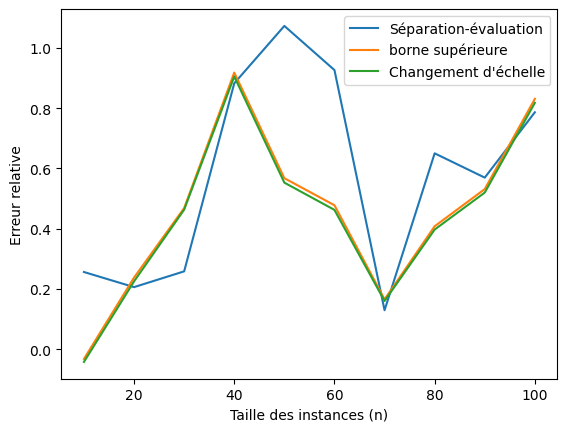

In [194]:

import matplotlib.pyplot as plt

# Génération d'instances aléatoires de taille croissante
n_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_value = 100
max_weight = 100
distribution = 'exponential'
correlation = 'None'

# Initialisation des listes d'erreurs relatives
se_errors = []
dp_errors = []
scale_errors = []

for n in n_values:
    print(f"n={n}")
    # Génération de l'instance aléatoire
    u, v, w = generate_knapsack_problem(n, max_value, max_weight, distribution, correlation)

    # Calcul de la solution exacte
    z_opt = knapsack_dp(u, v, w)


    z_lower_se = knapsack_sei(u, v, w)
    se_errors.append((z_lower_se - z_opt) / z_opt)

    z_lower_scale = knapsack_dp_changement_echelle(v, v, w, 2)
    scale_errors.append((z_lower_scale - z_opt) / z_opt)

    z_lower_dp = borne_sup(v, v, w)
    dp_errors.append((z_lower_dp - z_opt) / z_opt)

# Tracé des erreurs relatives en fonction de n
plt.plot(n_values, se_errors, label="Séparation-évaluation")
plt.plot(n_values, dp_errors, label=("borne supérieure"))
plt.plot(n_values, scale_errors, label="Changement d'échelle")
plt.legend()
plt.xlabel("Taille des instances (n)")
plt.ylabel("Erreur relative")
plt.show()


##### conclusion:

On conclut que l'algorithme de programmation dynamique est plus précise quelque la valeur de n et on note que les algorithmes de branch and bound et borne supérieure ont des incertitudes similaires : 
Pour n petit : notamment de 0 à environ 17 l'algorithme de changment d'échelle est plus précis
Pour n assez grand : les algorithmes de branch and bound et borne supérieure sont plus efficaces

In [175]:
#                                    Comparaison des vitesses d'executions

Dans cette partie on se propose de faire une étude comparative des vitesses d"executions

n=10
n=20
n=30
n=40
n=50
n=60
n=70
n=80
n=90
n=100


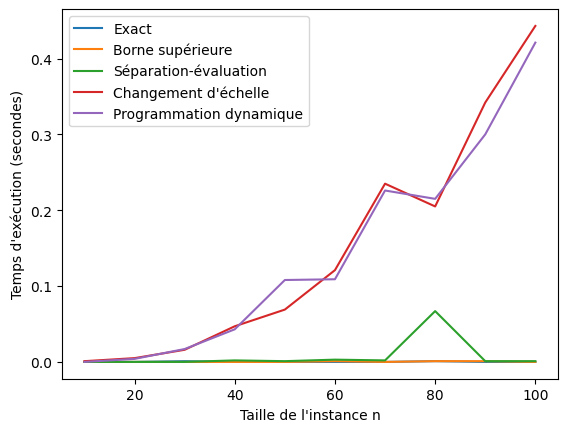

In [196]:
n_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_value = 100
max_weight = 100
distribution = 'uniform'
correlation = 'none'

exact_times = []
sup_times = []
se_times = []
scale_times = []
dp_times = []

for n in n_values:
    print(f"n={n}")
    # Génération de l'instance aléatoire
    v,w,b = generate_knapsack_problem(n, max_value, max_weight, distribution, correlation)

    start_time = time.time()
    z_opt = borne_inf(v,w,b)
    end_time = time.time()
    exact_times.append(end_time - start_time)

    # Calcul de la borne supérieure
    start_time = time.time()
    z_upper = borne_sup(v,w,b)
    end_time = time.time()
    sup_times.append(end_time - start_time)

    # Calcul de la borne inférieure avec la méthode de séparation-évaluation
    start_time = time.time()
    z_lower_se = knapsack_sei(v,w,b)
    end_time = time.time()
    se_times.append(end_time - start_time)

    # Calcul de la borne inférieure avec l'algorithme de changement d'échelle
    start_time = time.time()
    z_lower_scale = knapsack_dp_changement_echelle(v, w, b, 2)
    end_time = time.time()
    scale_times.append(end_time - start_time)

    # Calcul de la borne inférieure avec l'algorithme de programmation dynamique
    start_time = time.time()
    z_lower_dp = knapsack_dp(v, w, b)
    end_time = time.time()
    dp_times.append(end_time - start_time)

# Tracé des temps d'exécution en fonction de la taille de l'instance n
plt.plot(n_values, exact_times, label='borne inférieure')
plt.plot(n_values, sup_times, label='Borne supérieure')
plt.plot(n_values, se_times, label='Séparation-évaluation')
plt.plot(n_values, scale_times, label='Changement d\'échelle')
plt.plot(n_values, dp_times, label='Programmation dynamique')
plt.xlabel('Taille de l\'instance n')
plt.ylabel('Temps d\'exécution (secondes)')
plt.legend()
plt.show()


#### conclusion :

Le graphe nous montre que les méthodes des bornes inférieures sont meilleures en terme de vitesse d'execution quelque soit les valeurs de n ensuite vient natuellement la separation évaluation
Ensuite, les algo de changement d'echelle et programmation dynamique sont plus lent en particulier la progrmmation dynamique est plus lente pour n assez grand.

In [ ]:
#                               comparaison des quantités de memoires utilisées

n=10
n=20
n=30
n=40
n=50
n=60
n=70
n=80
n=90
n=100


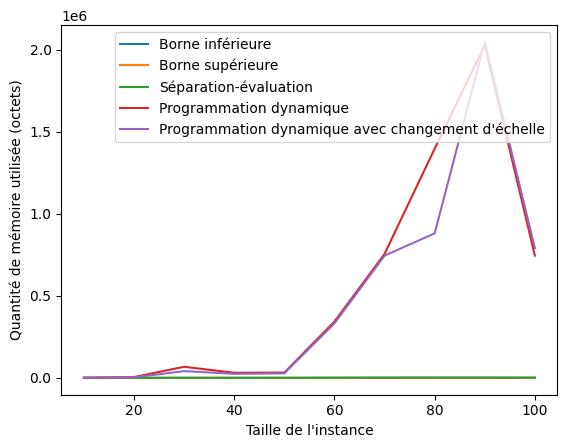

In [197]:
n_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_value = 100
max_weight = 100
distribution = 'exponential'
correlation = 'none'

# Initialisation des listes pour stocker les résultats
mem_usage_borne_inf = []
mem_usage_borne_sup = []
mem_usage_separation_evaluation = []
mem_usage_knapsack_dp = []
mem_usage_knapsack_dp_avec_changement_echelle = []

# Boucle sur les différentes tailles d'instances
for n in n_values:
    print(f"n={n}")
    v,w,b= generate_knapsack_problem(n, max_value, max_weight, distribution, correlation)

    # Calcul de la quantité de mémoire utilisée par chaque fonction
    tracemalloc.start()
    borne_inf(v,w,b)
    current, peak = tracemalloc.get_traced_memory()
    mem_usage_borne_inf.append(peak)
    tracemalloc.stop()

    tracemalloc.start()
    borne_sup(v,w,b)
    current, peak = tracemalloc.get_traced_memory()
    mem_usage_borne_sup.append(peak)
    tracemalloc.stop()

    tracemalloc.start()
    knapsack_sei(v,w,b)
    current, peak = tracemalloc.get_traced_memory()
    mem_usage_separation_evaluation.append(peak)
    tracemalloc.stop()

    tracemalloc.start()
    knapsack_dp(v,w,b)
    current, peak = tracemalloc.get_traced_memory()
    mem_usage_knapsack_dp.append(peak)
    tracemalloc.stop()

    tracemalloc.start()
    knapsack_dp_changement_echelle(v, w, b, 2)
    current, peak = tracemalloc.get_traced_memory()
    mem_usage_knapsack_dp_avec_changement_echelle.append(peak)
    tracemalloc.stop()

# Tracé des résultats
plt.plot(n_values, mem_usage_borne_inf, label="Borne inférieure")
plt.plot(n_values, mem_usage_borne_sup, label="Borne supérieure")
plt.plot(n_values, mem_usage_separation_evaluation, label="Séparation-évaluation")
plt.plot(n_values, mem_usage_knapsack_dp, label="Programmation dynamique")
plt.plot(n_values, mem_usage_knapsack_dp_avec_changement_echelle, label="Programmation dynamique avec changement d'échelle")
plt.xlabel("Taille de l'instance")
plt.ylabel("Quantité de mémoire utilisée (octets)")
plt.legend()
plt.show()


On remarque quelque soit la taille de n les approches borne inf borne sup et branch and bound n'utilisent pas beacoup de ressources, donc sont meilleiurs dans ce contexte. 
Et on remarque pour n allant jusqu'à environ 45 objets les approches de programmation dynamique uitlisent peu de ressources et au de là ça croît jusqu'à environ 90 objets avant de décroit pour des n grands